In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_df.csv")

In [5]:
df.describe()

,CGPA,10th Class Science Marks (out of 100),10th Class Maths Marks (out of 100),10th Class English/Language Marks (out of 100),10th Class Overall Percentage,12th Class Physics Marks (out of 100),12th Class Maths Marks (out of 100),12th Class Chemistry Marks (out of 100),12th Class English/Language Marks (out of 100),12th Class Overall Percentage,JEE Mains Session 1 Maths Percentile,JEE Mains Session 1 Physics Percentile,JEE Mains Session 1 Chemistry Percentile,JEE Mains Session 1 Overall Score,JEE Mains Session 2 Maths Percentile,JEE Mains Session 2 Physics Percentile,JEE Mains Session 2 Chemistry Percentile,JEE Mains Session 2 Overall Percentile
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,7.027848,87.012658,89.854430,86.215190,89.252278,80.318776,74.489451,79.757384,81.664557,80.625633,63.964557,80.843671,77.808228,81.793481,65.419620,80.373418,77.410759,81.519620
std,0.992512,8.297791,7.289139,7.542104,5.019557,10.114927,14.000590,11.698842,8.565678,7.909647,21.462683,13.502071,17.341600,11.115008,23.036721,17.205789,19.493444,13.980302
min,0.200000,60.000000,64.000000,59.000000,72.800000,53.000000,38.000000,50.000000,48.000000,53.400000,4.100000,22.300000,16.600000,17.700000,1.100000,6.200000,7.100000,5.200000
25%,6.500000,81.000000,87.000000,82.000000,85.800000,73.000000,63.000000,71.250000,77.000000,75.800000,47.900000,74.400000,71.500000,76.350000,47.475000,76.750000,69.025000,77.925000
50%,7.100000,90.500000,91.500000,87.000000,90.000000,81.000000,75.000000,81.000000,82.500000,80.400000,68.300000,83.750000,82.500000,84.650000,72.550000,86.100000,84.600000,85.350000
75%,7.700000,93.000000,95.000000,91.750000,92.800000,88.000000,86.000000,88.000000,88.750000,86.200000,82.650000,90.875000,90.500000,89.400000,85.200000,90.800000,91.100000,90.000000
max,8.600000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,97.000000,97.400000,96.300000,97.800000,98.100000,97.700000,96.300000,97.000000,98.700000,97.600000


In [11]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numerical_cols].corr()['CGPA'].sort_values(ascending=False)
display(correlations)

CGPA                                              1.000000
12th Class Overall Percentage                     0.344567
10th Class Overall Percentage                     0.314858
12th Class Maths Marks (out of 100)               0.309010
10th Class English/Language Marks (out of 100)    0.261778
12th Class Physics Marks (out of 100)             0.254530
10th Class Maths Marks (out of 100)               0.216882
12th Class English/Language Marks (out of 100)    0.215529
12th Class Chemistry Marks (out of 100)           0.204429
JEE Mains Session 1 Maths Percentile              0.184339
10th Class Science Marks (out of 100)             0.184025
JEE Mains Session 2 Overall  Percentile           0.171737
JEE Mains Session 2 Physics  Percentile           0.167137
JEE Mains Session 2 Chemistry  Percentile         0.100470
JEE Mains Session 2 Maths  Percentile             0.095689
JEE Mains Session 1 Overall Score                 0.091371
JEE Mains Session 1 Physics  Percentile           0.0555

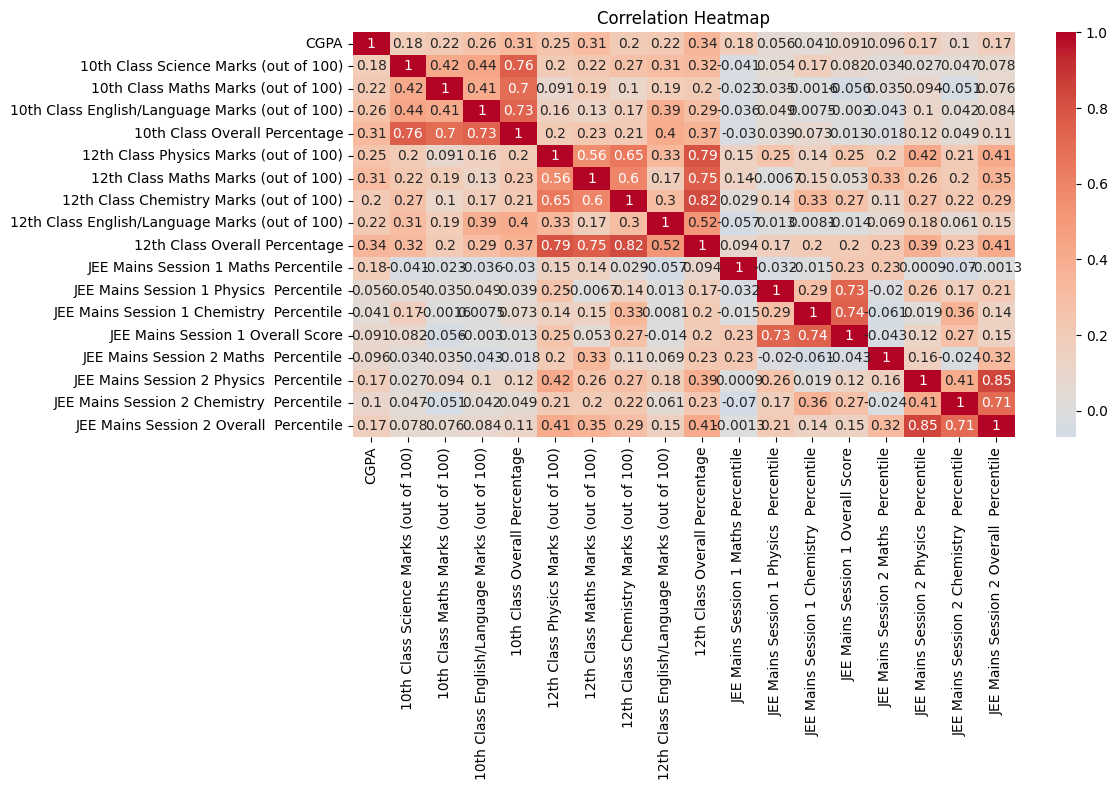

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### OutComes
1. There is very less correlation with  CGPA and other features.
<br>
There, we need to find another way to have a concreate or appropriate way to have better correlation.

In [12]:
df['10th_avg'] = df[['10th Class Science Marks (out of 100)', 
                        '10th Class Maths Marks (out of 100)', 
                        '10th Class English/Language Marks (out of 100)']].mean(axis=1)

df['12th_avg'] = df[['12th Class Physics Marks (out of 100)',
                        '12th Class Maths Marks (out of 100)',
                        '12th Class Chemistry Marks (out of 100)',
                        '12th Class English/Language Marks (out of 100)']].mean(axis=1)

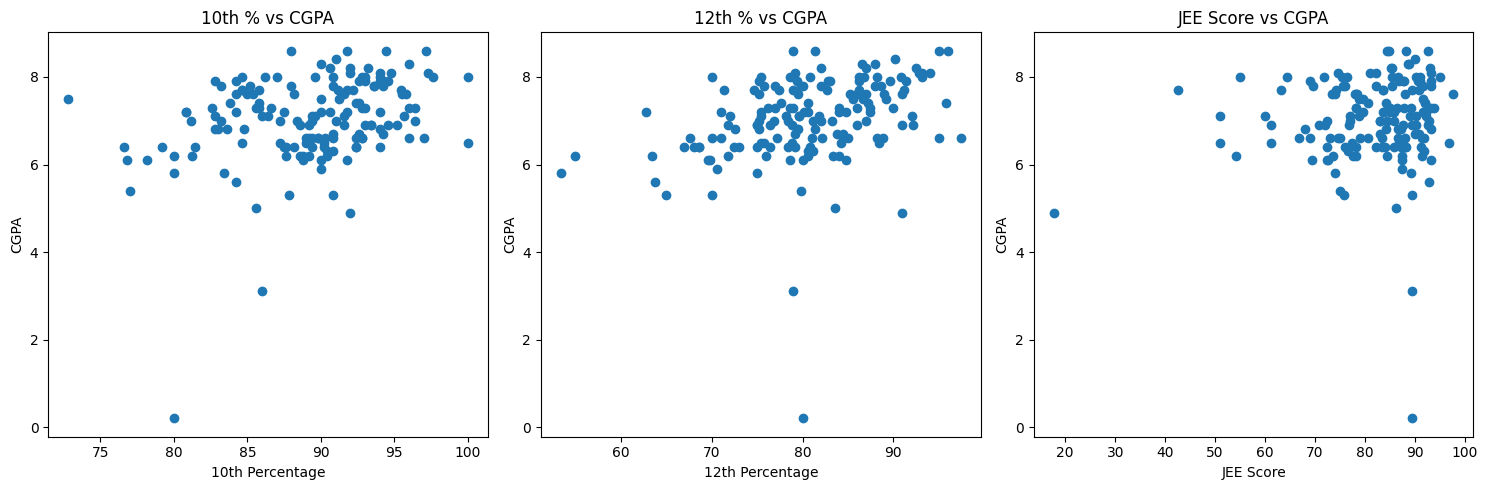

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(df['10th Class Overall Percentage'], df['CGPA'])
plt.title('10th % vs CGPA')
plt.xlabel('10th Percentage')
plt.ylabel('CGPA')


plt.subplot(132)
plt.scatter(df['12th Class Overall Percentage'], df['CGPA'])
plt.title('12th % vs CGPA')
plt.xlabel('12th Percentage')
plt.ylabel('CGPA')

plt.subplot(133)
plt.scatter(df['JEE Mains Session 1 Overall Score'], df['CGPA'])
plt.title('JEE Score vs CGPA')
plt.xlabel('JEE Score')
plt.ylabel('CGPA')

plt.tight_layout()
plt.show()


Mathematics Performance Change (12th - 10th):


count    158.000000
mean     -15.364979
std       14.480178
min      -59.000000
25%      -25.000000
50%      -15.000000
75%       -5.000000
max       21.000000
dtype: float64


Science/Physics Performance Change (12th - 10th):


count    158.000000
mean      -6.693882
std       11.734554
min      -38.000000
25%      -14.000000
50%       -6.500000
75%        1.000000
max       24.000000
dtype: float64


English Performance Change (12th - 10th):


count    158.000000
mean      -4.550633
std        8.943237
min      -34.000000
25%      -10.000000
50%       -5.000000
75%        1.000000
max       20.000000
dtype: float64

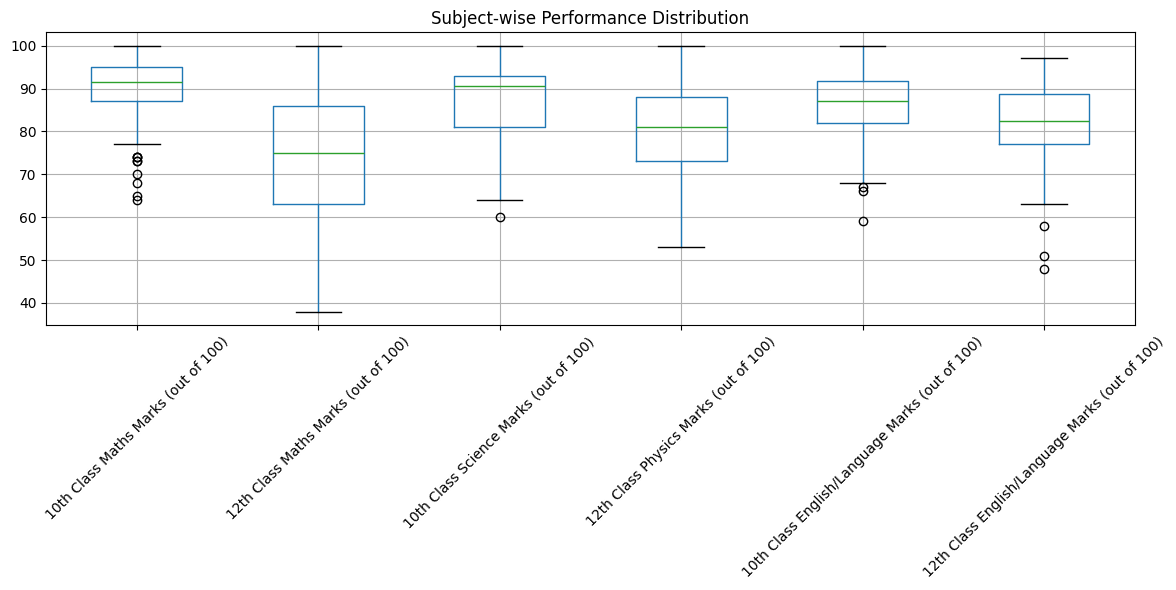

In [18]:
# Subject-wise analysis
subjects = {
    'Mathematics': ['10th Class Maths Marks (out of 100)', '12th Class Maths Marks (out of 100)'],
    'Science/Physics': ['10th Class Science Marks (out of 100)', '12th Class Physics Marks (out of 100)'],
    'English': ['10th Class English/Language Marks (out of 100)', '12th Class English/Language Marks (out of 100)']
}


# for subject, columns in subjects.items():
#     improvement = df[columns[1]] - df[columns[0]]
#     print(f"{subject} Performance Change (12th - 10th):")
#     display(improvement.describe())

# Box plots 
plt.figure(figsize=(12, 6))
df.boxplot([col for cols in subjects.values() for col in cols])
plt.xticks(rotation=45)
plt.title('Subject-wise Performance Distribution')
plt.tight_layout()
plt.show()


## Gender Based distribution

In [21]:
print("Gender Distribution:")
display(df['Gender'].value_counts())

Gender Distribution:


Gender
Male      125
Female     33
Name: count, dtype: int64

In [23]:
print("Average CGPA by Gender:")
display(df.groupby('Gender')['CGPA'].mean())

Average CGPA by Gender:


Gender
Female    7.269697
Male      6.964000
Name: CGPA, dtype: float64

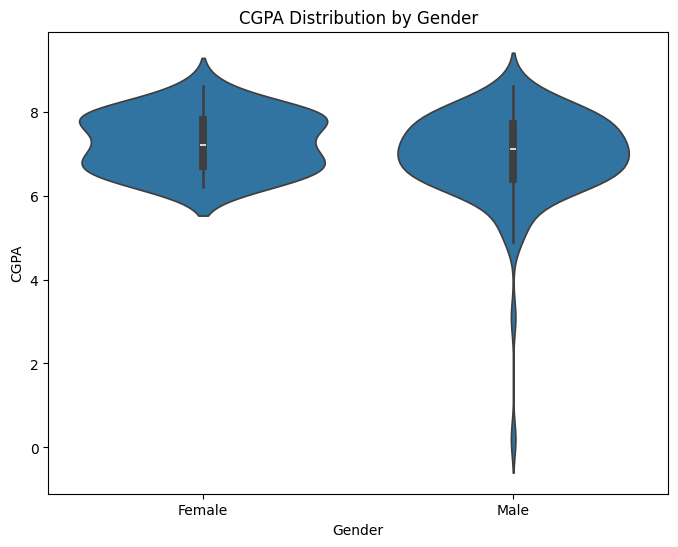

In [25]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='CGPA', data=df)
plt.title('CGPA Distribution by Gender')
plt.show()

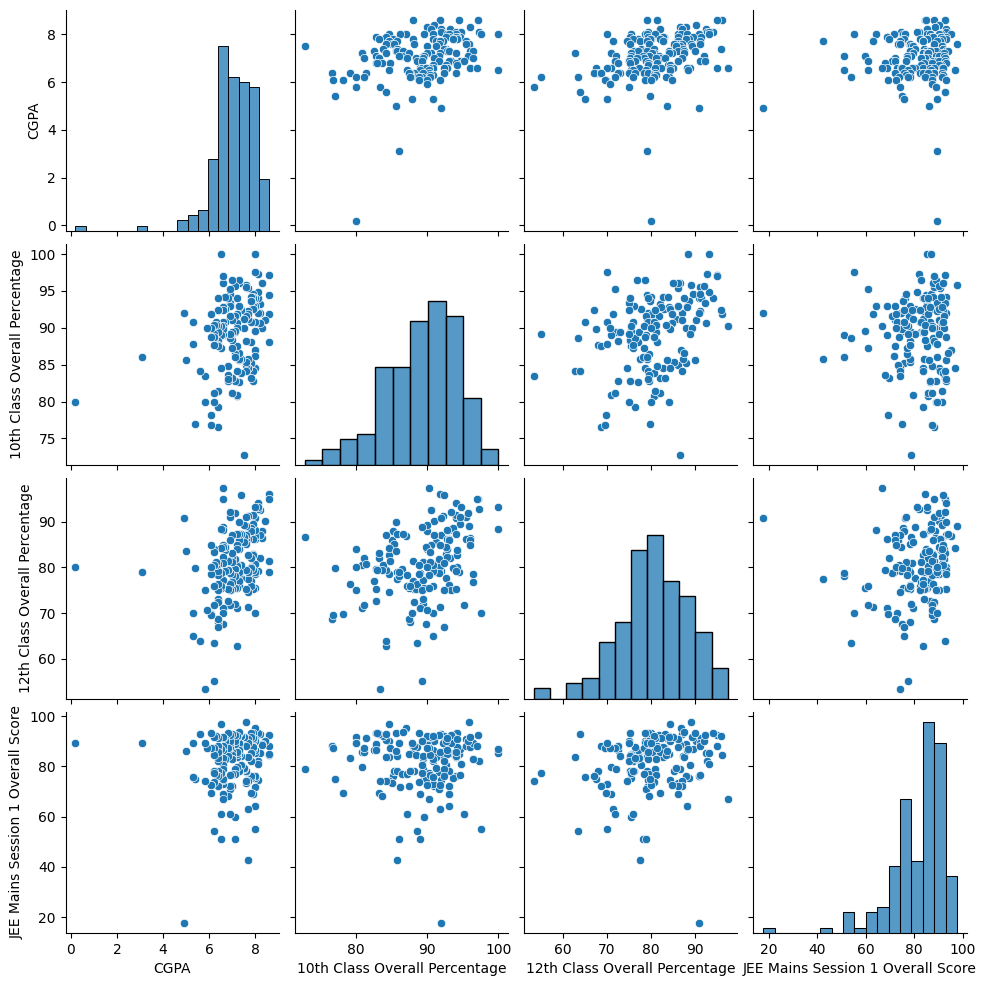

In [26]:
key_vars = ['CGPA', '10th Class Overall Percentage', '12th Class Overall Percentage', 
           'JEE Mains Session 1 Overall Score']
sns.pairplot(df[key_vars])
plt.show()

In [27]:
print("\nKey Statistics:")
print("1. Average improvement from 10th to 12th:", 
      (df['12th Class Overall Percentage'] - df['10th Class Overall Percentage']).mean())
print("2. Correlation between JEE and CGPA:", 
      df['JEE Mains Session 1 Overall Score'].corr(df['CGPA']))
print("3. Best performing subject in 12th:", 
      df[['12th Class Physics Marks (out of 100)', 
            '12th Class Chemistry Marks (out of 100)', 
            '12th Class Maths Marks (out of 100)']].mean().idxmax())


Key Statistics:
1. Average improvement from 10th to 12th: -8.626645569620251
2. Correlation between JEE and CGPA: 0.09137050876421302
3. Best performing subject in 12th: 12th Class Physics Marks (out of 100)
